# Basics

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import pytz


In [13]:
# Adjusting the start and end times
frequency = "1m"
start_time = (datetime.now(pytz.timezone('UTC')) - timedelta(days=1)).strftime('%Y-%m-%d')  # 5 days ago from the current date
end_time = (datetime.now(pytz.timezone('UTC'))).strftime('%Y-%m-%d')  # Current date in UTC

In [18]:
# Define your tickers, start time, end time, and frequency
tickers = ["BTCC-B.TO"]

# Initialize an empty DataFrame for combined data
combined_data = pd.DataFrame()

# Retrieve historical data for each ticker
for ticker in tickers:
    # Download historical data for the ticker
    data = yf.download(ticker, start=start_time, end=end_time, interval=frequency)[['High', 'Low', 'Open', 'Close']]
    
    # Check if the index is already timezone-aware and convert timezone if necessary
    if data.index.tz is None:
        # If the index is not timezone-aware, localize to UTC first then convert to Pacific Time
        data.index = data.index.tz_localize('UTC').tz_convert('US/Pacific')
    else:
        # If the index is already timezone-aware, directly convert to Pacific Time
        data.index = data.index.tz_convert('US/Pacific')
    
    # Combine data for each ticker into a single DataFrame with unique column names
    for col in data.columns:
        combined_column_name = f"{ticker}_{col}"  # Create a unique column name
        combined_data[combined_column_name] = data[col]
combined_data

[*********************100%%**********************]  1 of 1 completed


,BTCC-B.TO_High,BTCC-B.TO_Low,BTCC-B.TO_Open,BTCC-B.TO_Close
Datetime,,,,
2024-02-13 06:30:00-08:00,9.520,9.480,9.520,9.480
2024-02-13 06:31:00-08:00,9.460,9.450,9.460,9.450
2024-02-13 06:32:00-08:00,9.490,9.470,9.470,9.490
2024-02-13 06:33:00-08:00,9.510,9.490,9.490,9.510
2024-02-13 06:34:00-08:00,9.520,9.510,9.520,9.510
...,...,...,...,...
2024-02-13 12:55:00-08:00,9.620,9.620,9.620,9.620
2024-02-13 12:56:00-08:00,9.625,9.625,9.625,9.625
2024-02-13 12:57:00-08:00,9.620,9.600,9.620,9.610


In [20]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import pytz

# Assuming combined_data is already defined and contains 'High' price data with datetime index in minutes

# Calculate the minute-to-minute changes in basis points correctly
data_diff = combined_data['BTCC-B.TO_High'].pct_change()  # This calculates t - (t-1) as a percentage change
data_bps = data_diff * 10_000  # Convert the percentage change to basis points

# Sum positive and negative basis point changes separately
positive_sum = data_bps[data_bps > 0].sum()
negative_sum = data_bps[data_bps < 0].sum()

# Output the results
positive_sum, negative_sum

final = positive_sum - negative_sum
final//100

15.0

### Current Open

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'combined_data' is your DataFrame

# Convert the index to a datetime index if it's not already
combined_data.index = pd.to_datetime(combined_data.index)

# Extract the date from the datetime index
combined_data['date'] = combined_data.index.date

# Extract the first 'BTC-CAD_Open' of each day
first_values_daily = combined_data.groupby('date')['BTC-CAD_Open'].first()

# Map these first opening values back onto the combined_data DataFrame
# This directly uses the current day's date to fetch the opening price
combined_data['current_day_open'] = combined_data['date'].apply(lambda x: first_values_daily.get(x, np.nan))

# Calculate percent change for each minute against the current day's opening price
combined_data['percent_change_high'] = (combined_data['BTC-CAD_High'] - combined_data['current_day_open']) / combined_data['current_day_open'] * 100
combined_data['percent_change_low'] = (combined_data['BTC-CAD_Low'] - combined_data['current_day_open']) / combined_data['current_day_open'] * 100

# Drop rows where 'percent_change' is NaN (i.e., potentially the first entries if the opening price is not available)
combined_data.dropna(subset=['percent_change_high'], inplace=True)
combined_data.dropna(subset=['percent_change_low'], inplace=True)

# The DataFrame 'combined_data' now contains the additional columns 'current_day_open' and 'percent_change',
# which represent the opening price of BTC-CAD for the current day and the percent change of the high price
# from the opening price for each entry, respectively.


In [5]:
combined_data

,BTC-CAD_High,BTC-CAD_Low,BTC-CAD_Open,BTC-CAD_Close,date,current_day_open,percent_change_high,percent_change_low
Datetime,,,,,,,,
2022-03-12 16:00:00-08:00,49631.058594,49464.855469,49583.980469,49599.464844,2022-03-12,49583.980469,0.094946,-0.240249
2022-03-12 17:00:00-08:00,49908.410156,49597.933594,49616.261719,49739.457031,2022-03-12,49583.980469,0.654303,0.028140
2022-03-12 18:00:00-08:00,49907.957031,49727.707031,49738.140625,49903.250000,2022-03-12,49583.980469,0.653390,0.289865
2022-03-12 19:00:00-08:00,49960.164062,49897.320312,49897.839844,49939.488281,2022-03-12,49583.980469,0.758680,0.631938
2022-03-12 20:00:00-08:00,49973.140625,49902.167969,49942.960938,49902.167969,2022-03-12,49583.980469,0.784851,0.641714
...,...,...,...,...,...,...,...,...
2024-02-10 11:00:00-08:00,64282.195312,63854.152344,63878.746094,64095.539062,2024-02-10,63678.890625,0.947417,0.275227
2024-02-10 12:00:00-08:00,64941.960938,64020.707031,64020.707031,64597.273438,2024-02-10,63678.890625,1.983499,0.536781
2024-02-10 13:00:00-08:00,64912.277344,64490.855469,64697.640625,64678.800781,2024-02-10,63678.890625,1.936885,1.275093


## Descriptive Stats

## Wasserstein

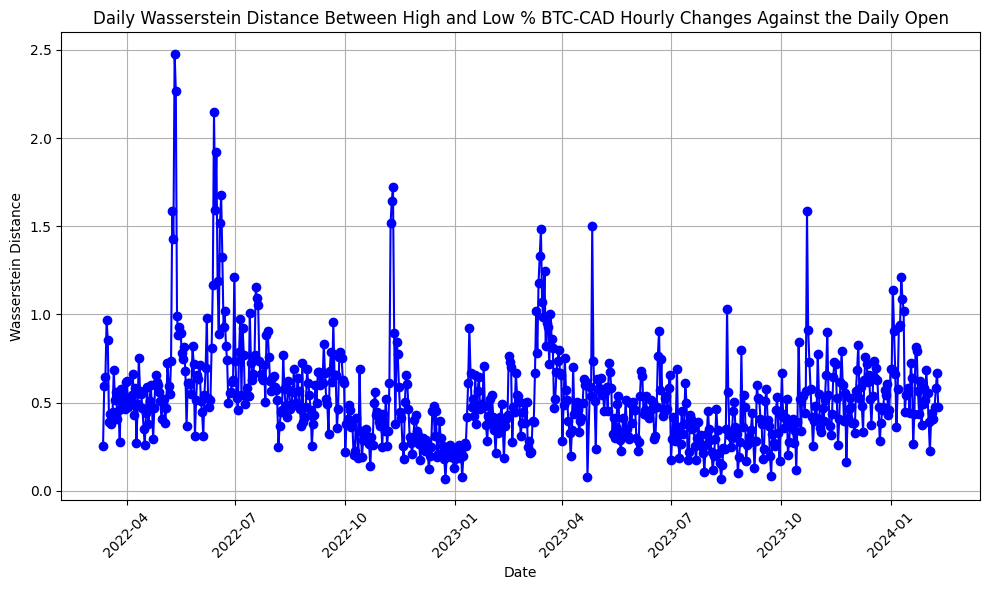

In [6]:
import pandas as pd
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt

# Assuming 'combined_data' is already defined and contains 'percent_change_high' and 'percent_change_low' columns

# Group by 'date' and calculate Wasserstein distance for each group
def calculate_wasserstein(group):
    high_changes = group['percent_change_high'].values
    low_changes = group['percent_change_low'].values
    return wasserstein_distance(high_changes, low_changes)

# Apply the function to each group and reset the index to get a DataFrame
wasserstein_distances = combined_data.groupby('date').apply(calculate_wasserstein).reset_index(name='wasserstein_distance')

# Rename the columns for clarity
wasserstein_distances.columns = ['Date', 'Wasserstein_Distance']

# Convert 'Date' column to datetime type if it's not already
wasserstein_distances['Date'] = pd.to_datetime(wasserstein_distances['Date'])

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(wasserstein_distances['Date'], wasserstein_distances['Wasserstein_Distance'], marker='o', linestyle='-', color='blue')

plt.title('Daily Wasserstein Distance Between High and Low % BTC-CAD Hourly Changes Against the Daily Open')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Wasserstein Distance')  # Y-axis label
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()


In [7]:
import pandas as pd

# Load the historical Wasserstein distances from the Parquet file
wass_dist_hist = pd.read_parquet('wass_dist_hist.parquet')

# Assuming 'wasserstein_distances' is calculated as per your provided code snippet

# Append the new distances to the historical DataFrame
wass_dist_complete = pd.concat([wass_dist_hist, wasserstein_distances], ignore_index=True)

# It's a good practice to sort the DataFrame by date if it's not already sorted
wass_dist_complete.sort_values(by='Date', inplace=True)

# Export the combined DataFrame to a new Parquet file
wass_dist_complete.to_parquet('wass_dist_complete.parquet', engine='pyarrow')


In [8]:
test = pd.read_parquet('wass_dist_complete.parquet')
test

,Date,Wasserstein_Distance
0,2018-05-15,1.180985
1,2018-05-16,1.282229
2,2018-05-17,1.024475
3,2018-05-18,0.977606
4,2018-05-19,0.744632
...,...,...
2081,2024-02-06,0.408980
2082,2024-02-07,0.477199
2083,2024-02-08,0.583208
2084,2024-02-09,0.668669


In [9]:
# Find the maximum Wasserstein Distance
max_distance = wasserstein_distances['Wasserstein_Distance'].max()

# Filter the DataFrame to find the row(s) with the maximum Wasserstein Distance
max_distance_row = wasserstein_distances[wasserstein_distances['Wasserstein_Distance'] == max_distance]

# Print the row with the maximum Wasserstein Distance
print(max_distance_row)


         Date  Wasserstein_Distance
60 2022-05-11              2.478939


In [10]:
# Ensure the DataFrame is indexed by 'Date'
wasserstein_distances.set_index('Date', inplace=True)

C:\Users\Windows\AppData\Local\Temp\ipykernel_28976\3249476659.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wasserstein_distances['Wasserstein_Distance'] = wasserstein_distances['Wasserstein_Distance'].fillna(method='ffill').fillna(method='bfill')


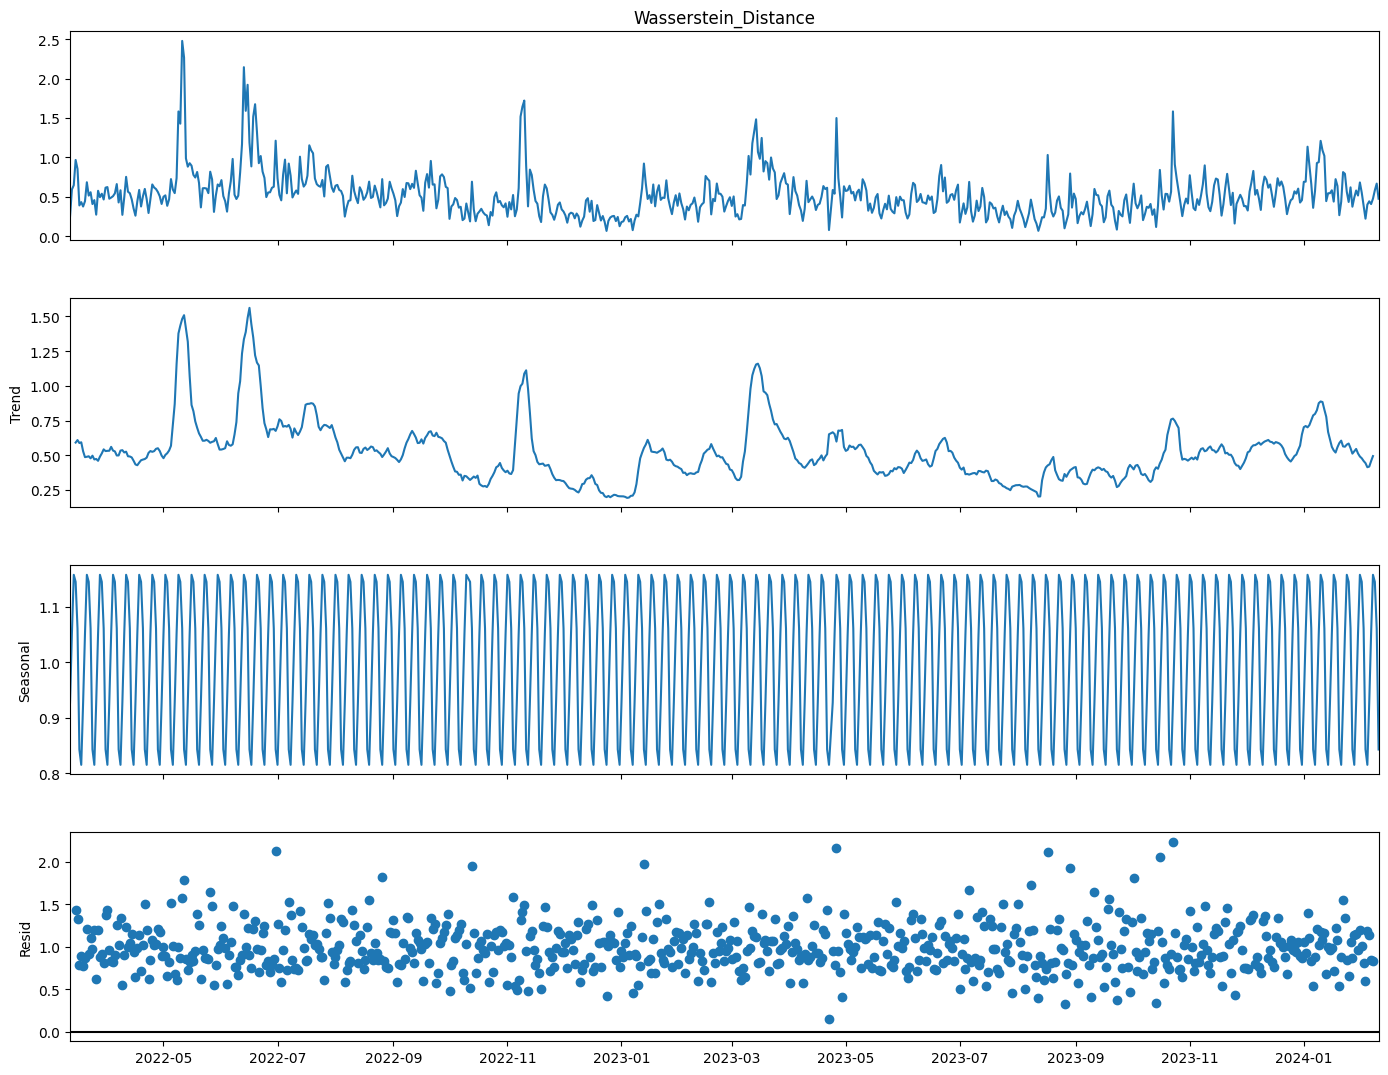

<Figure size 1000x600 with 0 Axes>

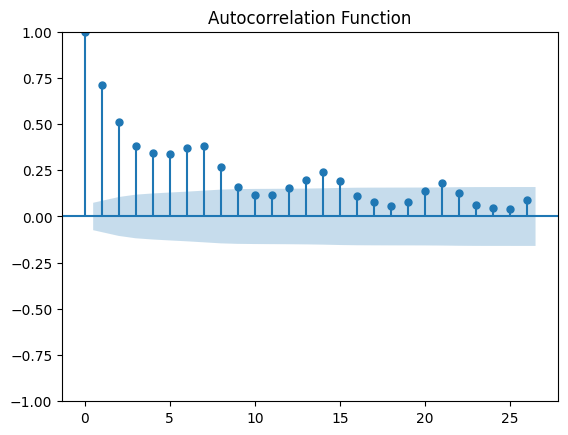

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

wasserstein_distances['Wasserstein_Distance'] = wasserstein_distances['Wasserstein_Distance'].fillna(method='ffill').fillna(method='bfill')
# Seasonal Decompose
result = seasonal_decompose(wasserstein_distances['Wasserstein_Distance'], model='multiplicative', period=7)  # Weekly seasonality

# Plotting the decomposed components of the time series
fig = result.plot()
fig.set_size_inches(15, 12)
plt.show()

# ACF Plot
plt.figure(figsize=(10, 6))
plot_acf(wasserstein_distances['Wasserstein_Distance'], lags=26)  # You can adjust the number of lags based on your dataset
plt.title('Autocorrelation Function')
plt.show()

C:\Users\Windows\AppData\Local\Temp\ipykernel_28976\208196363.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  wasserstein_distances_filled = wasserstein_distances['Wasserstein_Distance'].fillna(method='ffill').fillna(method='bfill')


Date
2022-03-12    0.252400
2022-03-13    0.593486
2022-03-14    0.647616
2022-03-15    0.968427
2022-03-16    0.854905
                ...   
2024-02-06    0.408980
2024-02-07    0.477199
2024-02-08    0.583208
2024-02-09    0.668669
2024-02-10    0.476447
Name: Wasserstein_Distance, Length: 699, dtype: float64

Best model:  ARIMA(2,1,1)(1,0,1)[7] intercept
Total fit time: 8.246 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  699
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 7)   Log Likelihood                 181.516
Date:                           Sun, 11 Feb 2024   AIC                           -349.031
Time:                                   13:59:53   BIC                           -317.194
Sample:                                        0   HQIC                          -336.723
                                           - 699                     

C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


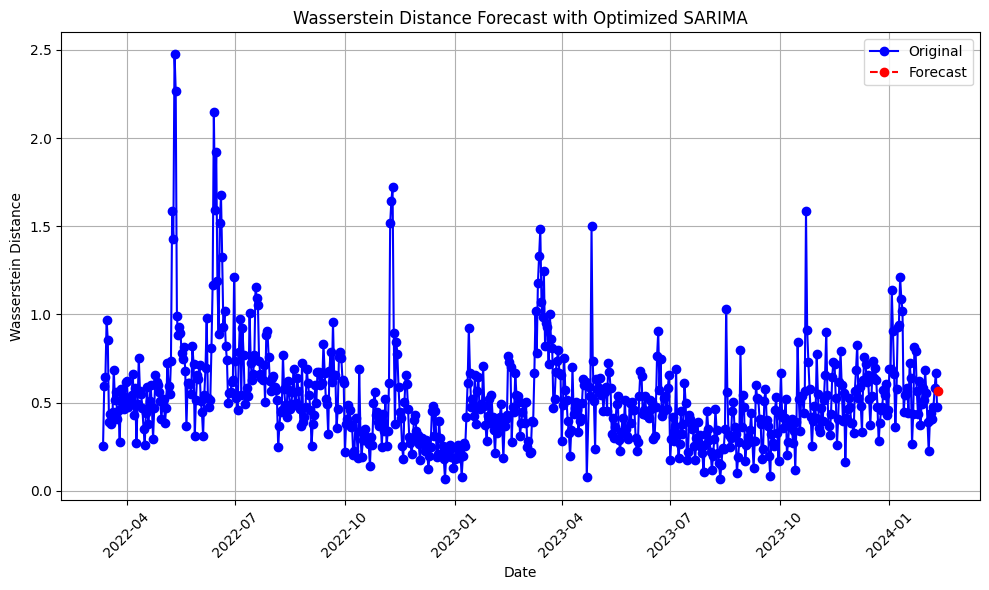

In [12]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd

# Fill missing values
wasserstein_distances_filled = wasserstein_distances['Wasserstein_Distance'].fillna(method='ffill').fillna(method='bfill')
print(wasserstein_distances_filled)

# Now, use auto_arima on the filled dataset
from pmdarima import auto_arima

auto_model = auto_arima(wasserstein_distances_filled,
                        seasonal=True,  # Enable seasonal differencing
                        m=7,           # The period for seasonal differencing
                        stepwise=False,  # Stepwise algorithm iterates through combinations of parameters faster
                        trace=True,     # Print status on the fits
                        error_action='ignore',  # Don't want to know if an order does not work
                        suppress_warnings=True,  # Suppress warnings
                        enforce_stationarity=False,
                        enforce_invertibility=False,
                        n_jobs=-1)

# Summary of the best model
print(auto_model.summary())

# Forecast the next N periods with the fitted model
forecast = auto_model.predict(n_periods=1)

# Generating forecast index
forecast_index = pd.date_range(start=wasserstein_distances_filled.index[-1], periods=2, freq='D')[1:]

# Plotting the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(wasserstein_distances_filled.index, wasserstein_distances_filled, label='Original', marker='o', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', marker='o', linestyle='--', color='red')

plt.title('Wasserstein Distance Forecast with Optimized SARIMA')
plt.xlabel('Date')
plt.ylabel('Wasserstein Distance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Assuming 'forecast' contains the forecasted values from the Holt-Winters model
forecast


699    0.567731
dtype: float64

## Negative Binomial - High

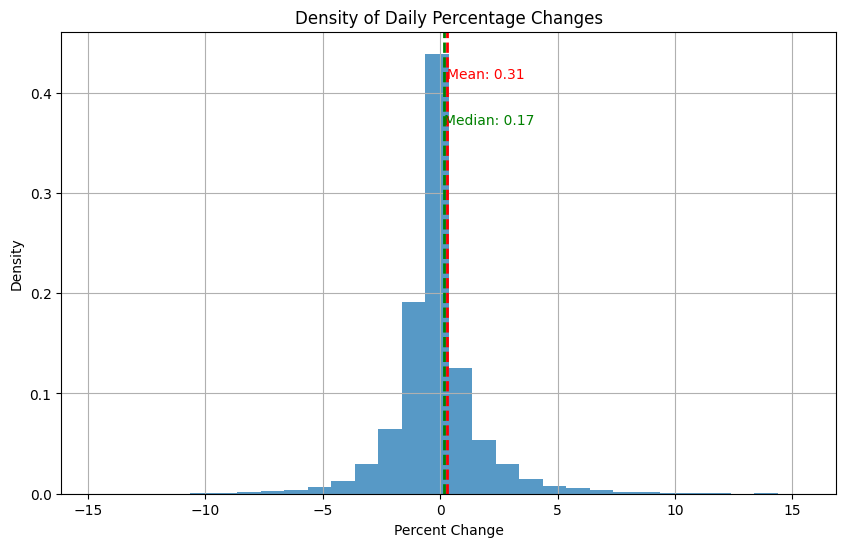

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'percent_change_high' is defined as before

# Calculate the median of percent changes
median_percent_change = np.median(combined_data['percent_change_high'])
mean_percent_change = np.mean(combined_data['percent_change_high'])

# 1. Determine Bin Edges
bin_width = 1  # Adjusted bin width to 1 for this example
min_change = combined_data['percent_change_high'].min()
max_change = combined_data['percent_change_high'].max()
bins = np.arange(min_change, max_change + bin_width, bin_width)

# 2. Compute Histogram
counts, bin_edges = np.histogram(combined_data['percent_change_high'], bins=bins)

# 3. Convert Counts to Density
total_counts = counts.sum()
bin_widths = np.diff(bin_edges)
density = counts / (total_counts * bin_widths)

# 4. Store Density Information in a DataFrame
density_df = pd.DataFrame({'Bin Edge Start': bin_edges[:-1], 'Density': density})

# Plotting the density manually
plt.figure(figsize=(10, 6))
plt.bar(density_df['Bin Edge Start'], density_df['Density'], width=bin_width, alpha=0.75)
plt.title('Density of Daily Percentage Changes')
plt.xlabel('Percent Change')
plt.ylabel('Density')
plt.grid(True)

# Add a line for the mean
plt.axvline(mean_percent_change, color='r', linestyle='dashed', linewidth=2)
plt.text(mean_percent_change, plt.ylim()[1] * 0.9, f'Mean: {mean_percent_change:.2f}', color='r')

# Add a line for the median
plt.axvline(median_percent_change, color='g', linestyle='dashed', linewidth=2)
plt.text(median_percent_change, plt.ylim()[1] * 0.8, f'Median: {median_percent_change:.2f}', color='g')

plt.show()


Negative Binomial Parameters for Absolute Negative Changes:
Shape (r): 1.0671344587113198
Probability of success (p): 0.4724249749901322
Expected Value: 1.1917098344668928


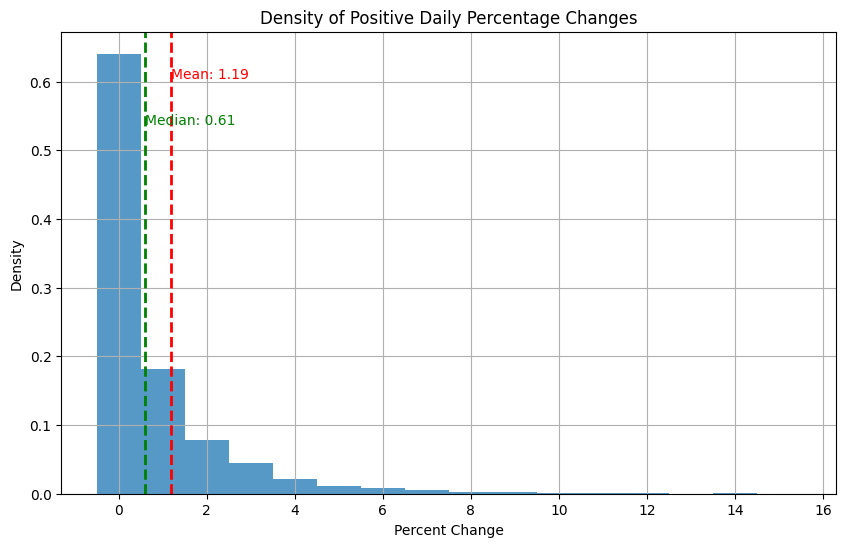

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import nbinom

# Assuming 'combined_data' and 'percent_change_high' are defined as before

# 1. Drop all negative percent changes
positive_changes = combined_data[combined_data['percent_change_high'] > 0]

# Calculate the median and mean of positive percent changes
median_percent_change = np.median(positive_changes['percent_change_high'])
mean_percent_change = np.mean(positive_changes['percent_change_high'])

# Fitting a Negative Binomial distribution
# First, calculate the variance of positive percent changes as it's needed to estimate the shape parameter
variance_percent_change = np.var(positive_changes['percent_change_high'])

# Step 4: Estimate Negative Binomial parameters
if mean_percent_change < variance_percent_change:
    r = mean_percent_change ** 2 / (variance_percent_change - mean_percent_change)
    p = mean_percent_change / variance_percent_change
    # Correct calculation of the expected value
    expected_value = r * (1 - p) / p
else:
    r, p, expected_value = np.nan, np.nan, np.nan  # Parameters not applicable if mean >= variance

print(f"Negative Binomial Parameters for Absolute Negative Changes:\nShape (r): {r}\nProbability of success (p): {p}\nExpected Value: {expected_value}")


# Adjusted to plot the positive values
bin_width = 1
min_change = positive_changes['percent_change_high'].min()
max_change = positive_changes['percent_change_high'].max()
bins = np.arange(min_change, max_change + bin_width, bin_width)

counts, bin_edges = np.histogram(positive_changes['percent_change_high'], bins=bins)

total_counts = counts.sum()
bin_widths = np.diff(bin_edges)
density = counts / (total_counts * bin_widths)

density_df = pd.DataFrame({'Bin Edge Start': bin_edges[:-1], 'Density': density})

plt.figure(figsize=(10, 6))
plt.bar(density_df['Bin Edge Start'], density_df['Density'], width=bin_width, alpha=0.75)
plt.title('Density of Positive Daily Percentage Changes')
plt.xlabel('Percent Change')
plt.ylabel('Density')
plt.grid(True)

plt.axvline(mean_percent_change, color='r', linestyle='dashed', linewidth=2)
plt.text(mean_percent_change, plt.ylim()[1] * 0.9, f'Mean: {mean_percent_change:.2f}', color='r')

plt.axvline(median_percent_change, color='g', linestyle='dashed', linewidth=2)
plt.text(median_percent_change, plt.ylim()[1] * 0.8, f'Median: {median_percent_change:.2f}', color='g')

plt.show()


## Negative Binomial - Low

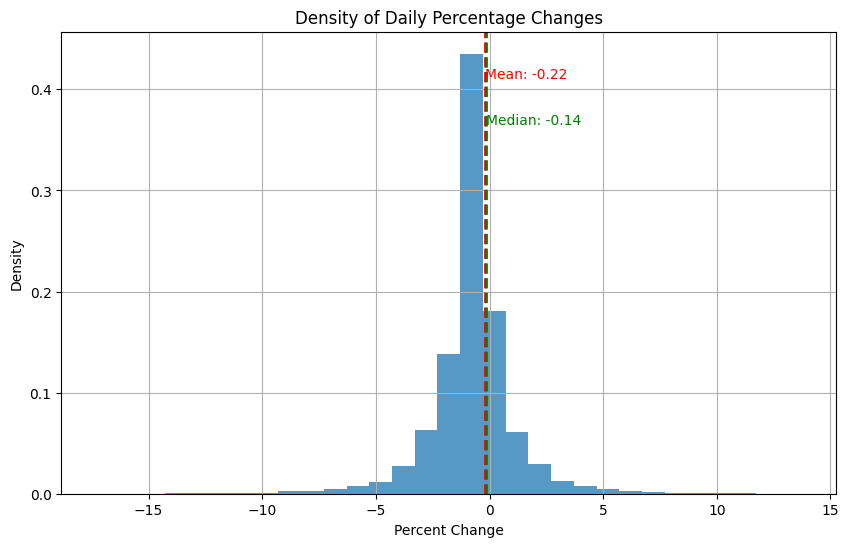

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'percent_change_high' is defined as before

# Calculate the median of percent changes
median_percent_change = np.median(combined_data['percent_change_low'])
mean_percent_change = np.mean(combined_data['percent_change_low'])

# 1. Determine Bin Edges
bin_width = 1  # Adjusted bin width to 1 for this example
min_change = combined_data['percent_change_low'].min()
max_change = combined_data['percent_change_low'].max()
bins = np.arange(min_change, max_change + bin_width, bin_width)

# 2. Compute Histogram
counts, bin_edges = np.histogram(combined_data['percent_change_low'], bins=bins)

# 3. Convert Counts to Density
total_counts = counts.sum()
bin_widths = np.diff(bin_edges)
density = counts / (total_counts * bin_widths)

# 4. Store Density Information in a DataFrame
density_df = pd.DataFrame({'Bin Edge Start': bin_edges[:-1], 'Density': density})

# Plotting the density manually
plt.figure(figsize=(10, 6))
plt.bar(density_df['Bin Edge Start'], density_df['Density'], width=bin_width, alpha=0.75)
plt.title('Density of Daily Percentage Changes')
plt.xlabel('Percent Change')
plt.ylabel('Density')
plt.grid(True)

# Add a line for the mean
plt.axvline(mean_percent_change, color='r', linestyle='dashed', linewidth=2)
plt.text(mean_percent_change, plt.ylim()[1] * 0.9, f'Mean: {mean_percent_change:.2f}', color='r')

# Add a line for the median
plt.axvline(median_percent_change, color='g', linestyle='dashed', linewidth=2)
plt.text(median_percent_change, plt.ylim()[1] * 0.8, f'Median: {median_percent_change:.2f}', color='g')

plt.show()


Negative Binomial Parameters for Absolute Negative Changes:
Shape (r): 1.2724316801547493
Probability of success (p): 0.5267254707915118
Expected Value: 1.14330811356106


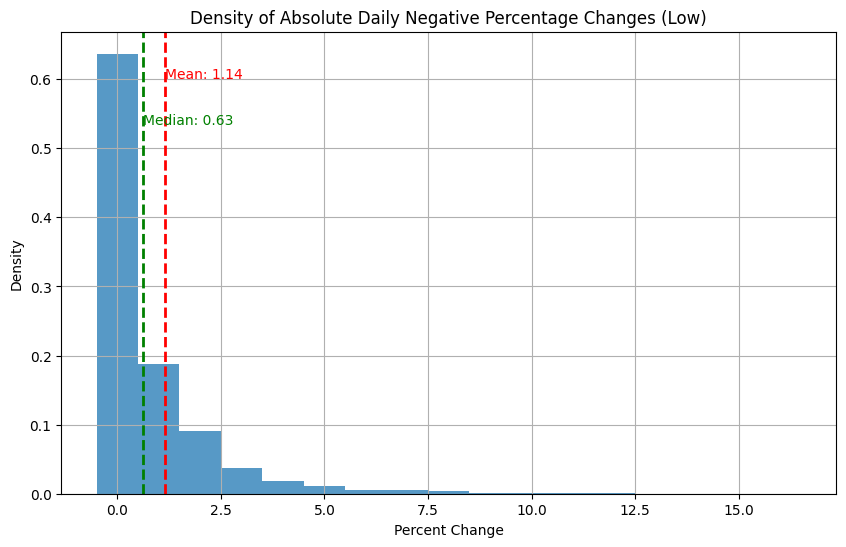

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'combined_data' and 'percent_change_low' are defined as before

# Step 1: Filter for negative percent changes and take their absolute value
negative_changes_abs = combined_data[combined_data['percent_change_low'] < 0]['percent_change_low'].abs()

# Step 2: Calculate the median and mean of these absolute negative percent changes
median_percent_change = np.median(negative_changes_abs)
mean_percent_change = np.mean(negative_changes_abs)

# Step 3: Calculate variance for estimating Negative Binomial parameters
variance_percent_change = np.var(negative_changes_abs, ddof=1)  # Use sample variance

# Step 4: Estimate Negative Binomial parameters
if mean_percent_change < variance_percent_change:
    r = mean_percent_change ** 2 / (variance_percent_change - mean_percent_change)
    p = mean_percent_change / variance_percent_change
    # Correct calculation of the expected value
    expected_value = r * (1 - p) / p
else:
    r, p, expected_value = np.nan, np.nan, np.nan  # Parameters not applicable if mean >= variance

print(f"Negative Binomial Parameters for Absolute Negative Changes:\nShape (r): {r}\nProbability of success (p): {p}\nExpected Value: {expected_value}")

# Adjust the bin edges to fit the adjusted data range for visualization
bin_width = 1
min_change = negative_changes_abs.min()
max_change = negative_changes_abs.max()
bins = np.arange(min_change, max_change + bin_width, bin_width)

# Compute histogram with the new data
counts, bin_edges = np.histogram(negative_changes_abs, bins=bins)

# Convert counts to density
total_counts = counts.sum()
bin_widths = np.diff(bin_edges)
density = counts / (total_counts * bin_widths)

# Store density information in a DataFrame for plotting
density_df = pd.DataFrame({'Bin Edge Start': bin_edges[:-1], 'Density': density})

# Plotting the density manually
plt.figure(figsize=(10, 6))
plt.bar(density_df['Bin Edge Start'], density_df['Density'], width=bin_width, alpha=0.75)
plt.title('Density of Absolute Daily Negative Percentage Changes (Low)')
plt.xlabel('Percent Change')
plt.ylabel('Density')
plt.grid(True)

# Add a line for the mean
plt.axvline(mean_percent_change, color='r', linestyle='dashed', linewidth=2)
plt.text(mean_percent_change, plt.ylim()[1] * 0.9, f'Mean: {mean_percent_change:.2f}', color='r')

# Add a line for the median
plt.axvline(median_percent_change, color='g', linestyle='dashed', linewidth=2)
plt.text(median_percent_change, plt.ylim()[1] * 0.8, f'Median: {median_percent_change:.2f}', color='g')

plt.show()
